# Cluster analysis of MD_1 and MD_2

Process: 
- gmx cluster -f \*skip10.system.xtc -s \*.tpr -cutoff 0.22 -g cluster.log -clid clust-id.xvg -minstruct 3 -method gromos 
- Read the clust-id.xvg file, using a stupid way to colorize different clusters on PCA mapping

In [2]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib
%matplotlib inline
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [3]:
residue_selection = "not (resid 622 or resid 623 or resid 624 or resid 933 or resid 934 or resid 935 or resid 1244 or resid 1245 or resid 1246 or resid 0 or resid 1 or resid 2 or resid 311 or resid 312 or resid 313)"

In [12]:
def ReadCluster(location):
    return pd.read_table(location,sep="        ", skiprows=23, names=['time','cluster'],engine='python')
Location = "/media/scottzhuang/data/MD/4NPQ_PH7_md1/"

In [23]:
def plotcluster(cluster, traj, note):
    def calculatePCA(traj):
        pca = PCA(n_components=3)
        reduced_cartesian = pca.fit_transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms * 3))
        print(pca.explained_variance_ratio_)
        return reduced_cartesian
    reduced_cartesian = calculatePCA(traj)
    fig = plt.figure()
    for t in traj.time:
        if (np.asarray(cluster['cluster']))[int(t / 4000)] == 1:
            plt.scatter(reduced_cartesian[int(t/4000),0], reduced_cartesian[int(t/4000),1],color="red")
        if (np.asarray(cluster['cluster']))[int(t / 4000)] == 2:
            plt.scatter(reduced_cartesian[int(t/4000),0], reduced_cartesian[int(t/4000),1],color="blue")
        if (np.asarray(cluster['cluster']))[int(t / 4000)] == 3:
            plt.scatter(reduced_cartesian[int(t/4000),0], reduced_cartesian[int(t/4000),1],color="green")  
        if (np.asarray(cluster['cluster']))[int(t / 4000)] == 4:
            plt.scatter(reduced_cartesian[int(t/4000),0], reduced_cartesian[int(t/4000),1],color="black")
        if (np.asarray(cluster['cluster']))[int(t / 4000)] == 5:
            plt.scatter(reduced_cartesian[int(t/4000),0], reduced_cartesian[int(t/4000),1],color="purple") 
    #cbar = plt.colorbar()
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Whole PCA of' + note)
    plt.show()
    
    fig = plt.figure()
    plt.scatter(reduced_cartesian[:,0], reduced_cartesian[:,1],c=traj.time)
    cbar = plt.colorbar()
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Whole PCA of'  + note)
    cbar.set_label("Time")
    plt.show()

## MD1

[0.2216291  0.09583613 0.08914894]


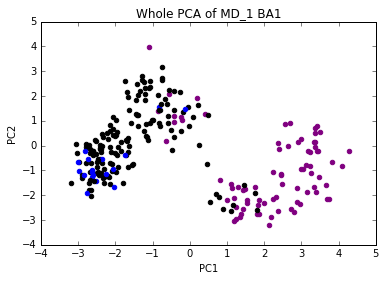

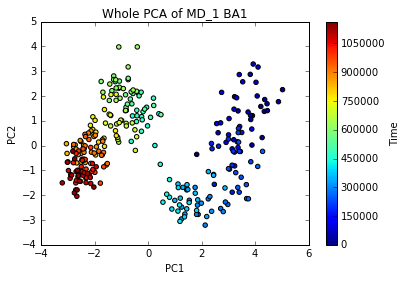

In [24]:
traj_BA1_md1 = md.load("/media/scottzhuang/data/MD/4NPQ_PH7_md1/BA1/4NPQ_BA1_md.skip100.ca.xtc",top="/media/scottzhuang/data/MD/4NPQ_PH7_md1/BA1/4NPQ_BA1_md.ca.gro")
traj_BA1_md1.superpose(traj_BA1_md1,0)
cluster_BA1_md1 = ReadCluster(Location + 'BA1/clust-id.xvg')
plotcluster(cluster_BA1_md1,traj_BA1_md1, " MD_1 BA1")

[0.2322865  0.11432858 0.0961127 ]


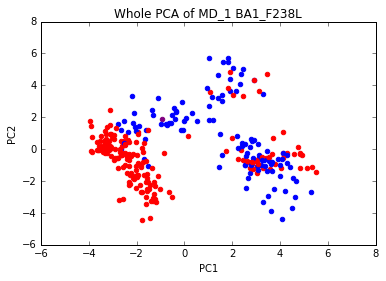

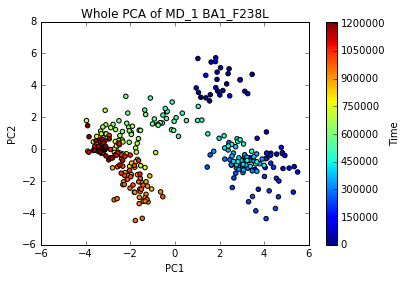

In [25]:
traj_F238L_md1 = md.load("/media/scottzhuang/data/MD/4NPQ_PH7_md1/BA1_F238L/4NPQ_BA1_F238L_md.skip100.ca.xtc",top="/media/scottzhuang/data/MD/4NPQ_PH7_md1/BA1_F238L/4NPQ_BA1_F238L_md.ca.gro")
traj_F238L_md1.superpose(traj_F238L_md1,0)
cluster_F238L_md1 = ReadCluster(Location + 'BA1_F238L/clust-id.xvg')
plotcluster(cluster_F238L_md1,traj_F238L_md1, " MD_1 BA1_F238L")

[0.23290725 0.20032413 0.07602477]


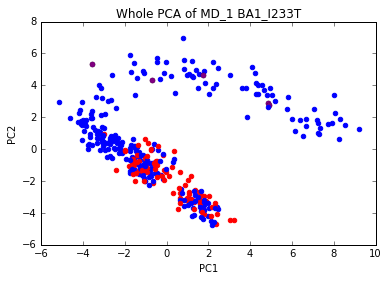

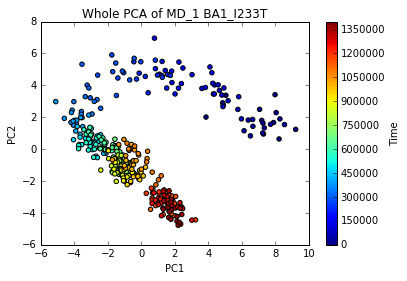

In [6]:
traj_I233T_md1 = md.load("/media/scottzhuang/data/MD/4NPQ_PH7_md1/BA1_I233T/4NPQ_BA1_I233T_md.skip100.ca.xtc",top="/media/scottzhuang/data/MD/4NPQ_PH7_md1/BA1_I233T/4NPQ_BA1_I233T_md.ca.gro")
traj_I233T_md1.superpose(traj_I233T_md1,0)
cluster_I233T_md1 = ReadCluster(Location + 'BA1_I233T/clust-id.xvg')
plotcluster(cluster_I233T_md1,traj_I233T_md1, " MD_1 BA1_I233T")

[0.39687272 0.11435104 0.05656347]


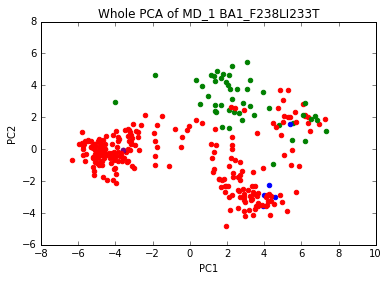

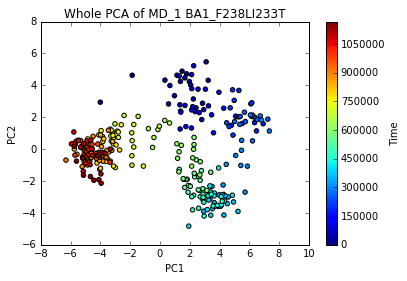

In [7]:
traj_F238LI233T_md1 = md.load("/media/scottzhuang/data/MD/4NPQ_PH7_md1/BA1_F238LI233T/4NPQ_BA1_F238LI233T_md.skip100.ca.xtc",top="/media/scottzhuang/data/MD/4NPQ_PH7_md1/BA1_F238LI233T/4NPQ_BA1_F238LI233T_md.ca.gro")
traj_F238LI233T_md1.superpose(traj_F238LI233T_md1,0)
cluster_F238LI233T_md1 = ReadCluster(Location + 'BA1_F238LI233T/clust-id.xvg')
plotcluster(cluster_F238LI233T_md1,traj_F238LI233T_md1," MD_1 BA1_F238LI233T")

## MD2

[0.42753342 0.07907633 0.05142885]


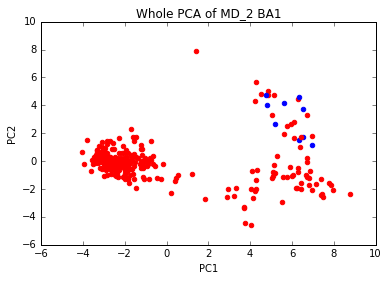

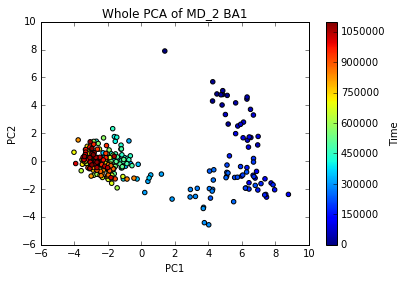

In [8]:
traj_BA1_md2 = md.load("/media/scottzhuang/data/MD/4NPQ_PH7_md2/BA1/4NPQ_BA1_md2.skip100.ca.xtc",top="/media/scottzhuang/data/MD/4NPQ_PH7_md2/BA1/4NPQ_BA1_md2.ca.gro")
traj_BA1_md2.superpose(traj_BA1_md2,0)
cluster_BA1_md2 = ReadCluster(Location + 'BA1/clust-id.xvg')
plotcluster(cluster_BA1_md2,traj_BA1_md2," MD_2 BA1")

[0.42434762 0.11758029 0.04587217]


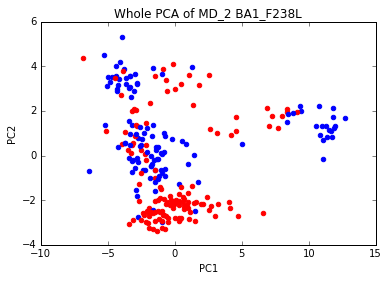

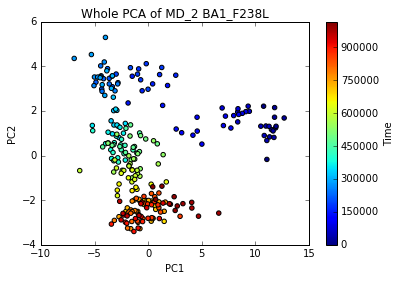

In [12]:
traj_F238L_md2 = md.load("/media/scottzhuang/data/MD/4NPQ_PH7_md2/BA1_F238L/4NPQ_BA1_F238L_md2.skip100.ca.xtc",top="/media/scottzhuang/data/MD/4NPQ_PH7_md2/BA1_F238L/4NPQ_BA1_F238L_md2.ca.gro")
traj_F238L_md2.superpose(traj_F238L_md2,0)
cluster_F238L_md2 = ReadCluster(Location + 'BA1_F238L/clust-id.xvg')
plotcluster(cluster_F238L_md2,traj_F238L_md2," MD_2 BA1_F238L")

[0.21031769 0.10591116 0.06580959]


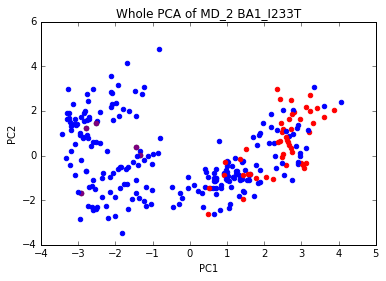

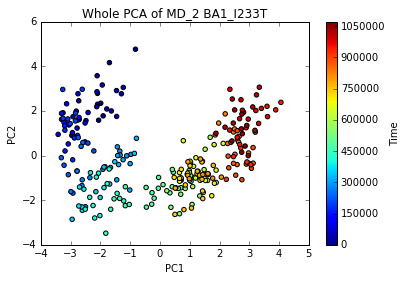

In [10]:
traj_I233T_md2 = md.load("/media/scottzhuang/data/MD/4NPQ_PH7_md2/BA1_I233T/4NPQ_BA1_I233T_md2.skip100.ca.xtc",top="/media/scottzhuang/data/MD/4NPQ_PH7_md2/BA1_I233T/4NPQ_BA1_I233T_md2.ca.gro")
traj_I233T_md2.superpose(traj_I233T_md2,0)
cluster_I233T_md2 = ReadCluster(Location + 'BA1_I233T/clust-id.xvg')
plotcluster(cluster_I233T_md2,traj_I233T_md2," MD_2 BA1_I233T")

[0.38714946 0.09375668 0.06355233]


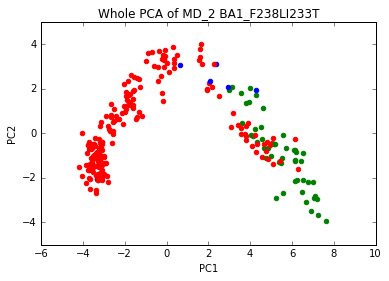

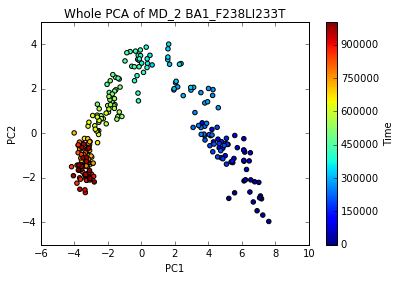

In [11]:
traj_F238LI233T_md2 = md.load("/media/scottzhuang/data/MD/4NPQ_PH7_md2/BA1_F238LI233T/4NPQ_BA1_F238LI233T_md2.skip100.ca.xtc",top="/media/scottzhuang/data/MD/4NPQ_PH7_md2/BA1_F238LI233T/4NPQ_BA1_F238LI233T_md2.ca.gro")
traj_F238LI233T_md2.superpose(traj_F238LI233T_md2,0)
cluster_F238LI233T_md2 = ReadCluster(Location + 'BA1_F238LI233T/clust-id.xvg')
plotcluster(cluster_F238LI233T_md2,traj_F238LI233T_md2," MD_2 BA1_F238LI233T")

## Mahalanobis Clustering

In [13]:
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [67]:
def MahalanobisClustering(md_rep,molecule):
    if md_rep == '1':
        traj_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md' + md_rep + '/' + molecule + '/4NPQ_' + molecule + '_md.skip100.ca.xtc'
        top_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md' + md_rep + '/' + molecule + '/4NPQ_' + molecule + '_md.ca.gro'
    else:
        traj_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md' + md_rep + '/' + molecule + '/4NPQ_' + molecule + '_md' + md_rep + '.skip100.ca.xtc'
        top_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md' + md_rep + '/' + molecule + '/4NPQ_' + molecule + '_md' + md_rep + '.ca.gro'

    ref_location = '/media/scottzhuang/data/MD/pdb_ensemble/4NPQ_1.mer.pdb'
    traj = md.load(traj_location,top=top_location)
    ref = md.load(ref_location)
#    topology = traj.topology
#    traj = traj.atom_slice(topology.select(residue_selection))
    traj.superpose(traj,0)
    def calculatePCA(traj):
        pca = PCA(n_components=3)
        reduced_cartesian = pca.fit_transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms * 3))
        print(pca.explained_variance_ratio_)
        return reduced_cartesian
    reduced_cartesian = calculatePCA(traj)
    gmm = mixture.GaussianMixture(n_components=2, covariance_type='full')
    gmm.fit(reduced_cartesian)
    fig = plt.figure()
    for frame in range (0, traj.n_frames):
        y_pred = gmm.predict(reduced_cartesian)
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                                 '#f781bf', '#a65628', '#984ea3',
                                                 '#999999', '#e41a1c', '#dede00']),
                                          int(max(y_pred) + 1))))
        plt.scatter(reduced_cartesian[:, 0], reduced_cartesian[:, 1], s=10, color=colors[y_pred])

    plt.show()
    fig = plt.figure()
    plt.scatter(reduced_cartesian[:,0],reduced_cartesian[:,1],c=traj.time,alpha=0.7)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    cbar = plt.colorbar()
    plt.title('MD_' + md_rep + '  ' + molecule + ' Projection on Whole PCA')
    cbar.set_label('time')
    plt.show()

[0.2216291  0.09583613 0.08914894]


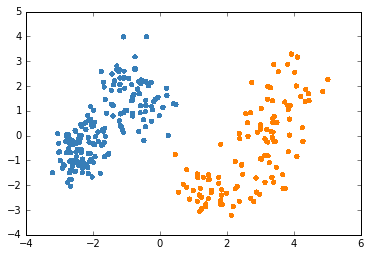

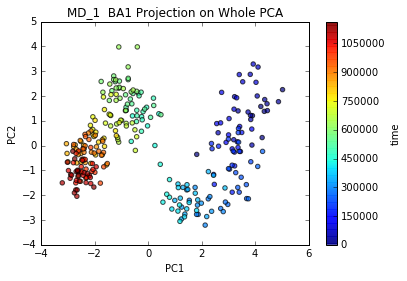

In [68]:
MahalanobisClustering("1","BA1")

[0.2322865  0.11432858 0.0961127 ]


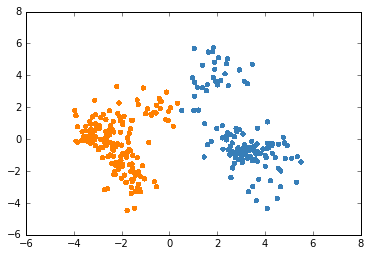

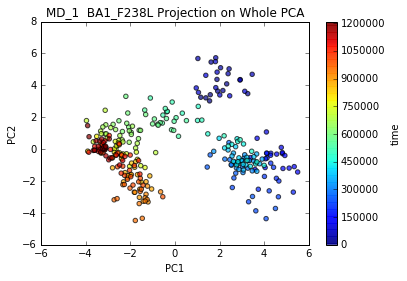

In [69]:
MahalanobisClustering("1","BA1_F238L")

[0.23290725 0.20032413 0.07602477]


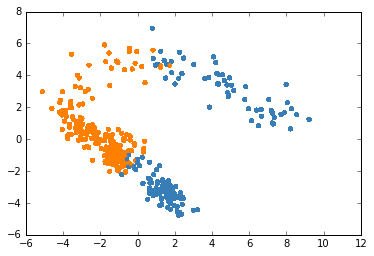

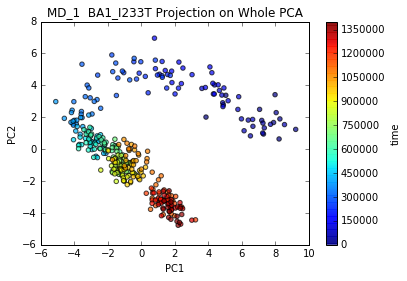

In [70]:
MahalanobisClustering("1","BA1_I233T")

[0.39687272 0.11435104 0.05656347]


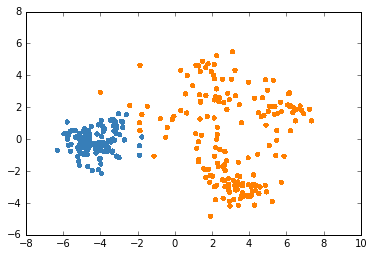

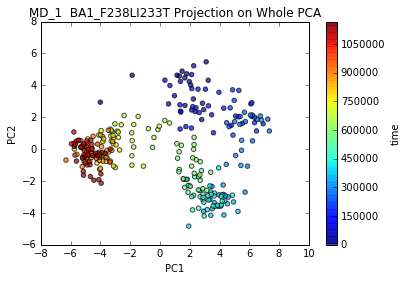

In [71]:
MahalanobisClustering("1","BA1_F238LI233T")

[0.42753342 0.07907633 0.05142885]


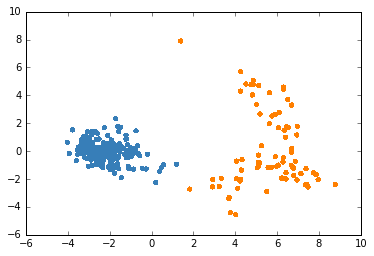

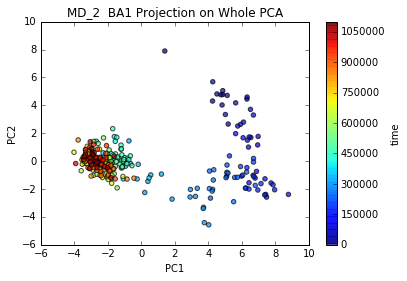

In [72]:
MahalanobisClustering("2","BA1")

[0.42434762 0.11758029 0.04587217]


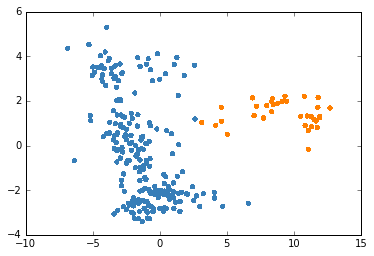

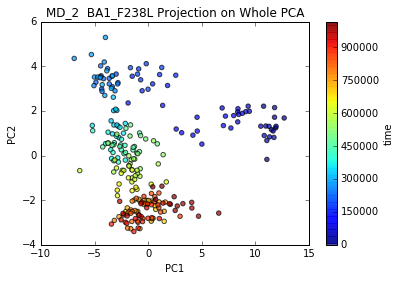

In [73]:
MahalanobisClustering("2","BA1_F238L")

[0.21031769 0.10591116 0.06580959]


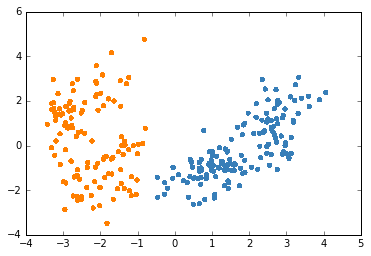

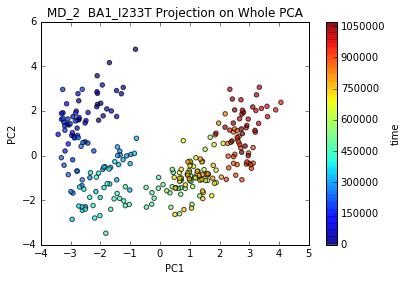

In [74]:
MahalanobisClustering("2","BA1_I233T")

[0.38714946 0.09375668 0.06355233]


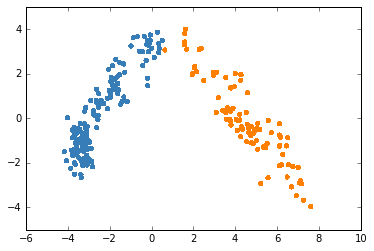

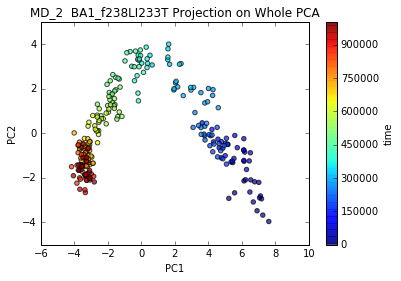

In [75]:
MahalanobisClustering("2","BA1_f238LI233T")